In [133]:
import json

import pandas as pd
import geopandas as gpd

import math
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
pio.templates.default = 'plotly_dark'
pd.set_option("display.precision", 3)

%matplotlib inline

In [32]:
#Available colors
colors2 = [
    "#023fa5", "#7d87b9", "#bb7784", 
    "#8e063b", "#4a6fe3", "#8595e1",
    "#e07b91", "#d33f6a", "#11c638", 
    "#8dd593", "#ef9708", "#0fcfc0", 
    "#9cded6", "#f79cd4"
]

In [149]:
#Functions
def plot_choropleth (gdf, title, col_name, col_label) :
    # set the value column that will be visualised
    # set the range for the choropleth values
    vmin, vmax = gdf[col_name].min(), my_wifi_5G_mean[col_name].max()
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(30, 10))
    # remove the axis
    ax.axis('off')
    # add a title and annotation
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
    ax.set_facecolor('black')
    
    # Create colorbar legend
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
    # add the colorbar to the figure
    fig.colorbar(sm)
    # create map
    gdf.plot(column=col_name, linewidth=7, ax=ax, edgecolor='0')
    
    # Add Labels
    gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
    gdf['coords'] = [coords[0] for coords in gdf['coords']]
    for idx, row in gdf.iterrows():
        plt.annotate(s=row[col_label], xy=row['coords'],horizontalalignment='center')

In [4]:
f = 'data/house_zones.geojson' 
with open(f) as file:
    house_zones = json.load(file)

In [158]:
#house_zones

In [6]:
hz = gpd.read_file(f)
hz = hz[['name','zone','subzone','geometry']].sort_values(['zone','subzone']).reset_index(drop=True)
hz

,name,zone,subzone,geometry
0,Pasillo-1,0,1,"POLYGON ((-11.31592 -10.69300, -10.67871 -10.6..."
1,Pasillo-2,0,2,"POLYGON ((-10.66223 -10.70379, -9.78333 -10.70..."
2,Pasillo-3,0,3,"POLYGON ((-9.76685 -10.69839, -9.18457 -10.698..."
3,Habitacion1-1,1,1,"POLYGON ((-9.16260 -10.96816, -8.62427 -10.968..."
4,Habitacion1-2,1,2,"POLYGON ((-9.16260 -11.42080, -8.62427 -11.420..."
5,Habitacion2-1,2,1,"POLYGON ((-9.76685 -11.14607, -9.18457 -11.146..."
6,Habitacion2-2,2,2,"POLYGON ((-9.76685 -11.58229, -9.17358 -11.582..."
7,Habitacion3-1,3,1,"POLYGON ((-9.77783 -10.43920, -9.29993 -10.439..."
8,Habitacion3-2,3,2,"POLYGON ((-9.28345 -10.43379, -8.76709 -10.433..."
9,Habitacion3-3,3,3,"POLYGON ((-9.78882 -9.96344, -9.29443 -9.96344..."


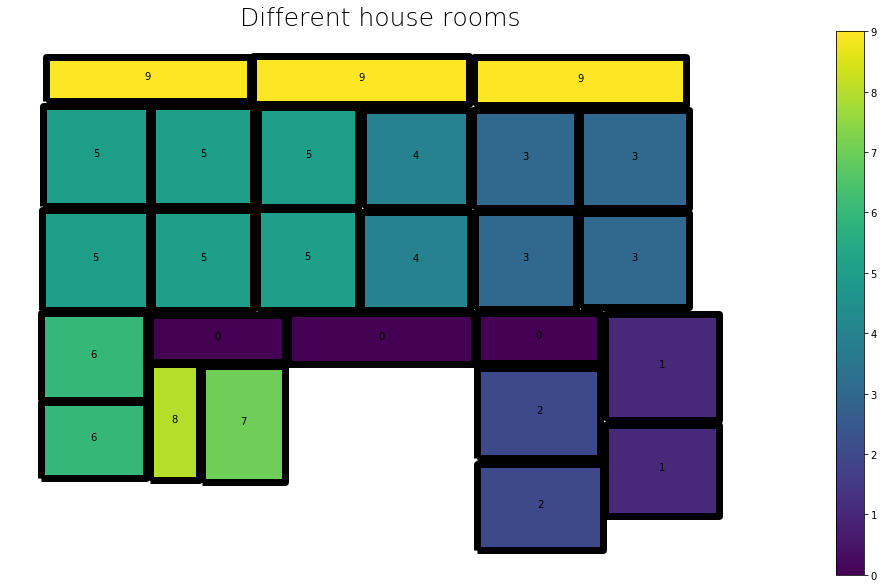

In [159]:
title = 'Different house rooms'
col_name = 'zone'
label = 'zone'
gdf = hz

#Plot choropleth    
plot_choropleth(gdf,title,col_name,label)

In [7]:
#Read measured data
scanned = pd.read_csv('data/scanned_networks.csv').dropna()
scanned = scanned[['BSSID','SSID','zone','subzone','dBm_Signal','Channel','Crypto']].reset_index(drop=True)
scanned['Channel'] = scanned.Channel.astype(int)
scanned

,BSSID,SSID,zone,subzone,dBm_Signal,Channel,Crypto
0,8c:e1:17:d0:64:0e,MASMOVIL_2G_HJsC,1,1,-88,1,"{'WPA/PSK', 'WPA2/PSK'}"
1,a0:8e:78:71:bf:8e,vodafoneBF88,1,1,-83,1,"{'WPA/PSK', 'WPA2/PSK'}"
2,62:8d:36:d1:75:61,Invitado-755E,1,1,-65,1,{'WEP'}
3,04:a2:22:1e:1a:16,MiFibra-1A14,1,1,-64,1,{'WEP'}
4,e4:ab:89:34:6a:6c,MOVISTAR_6A6B,1,1,-82,1,{'WPA2/PSK'}
...,...,...,...,...,...,...,...
2081,8c:e1:17:e6:98:7a,MIWIFI_2G_Q47X,9,3,-91,13,"{'WPA/PSK', 'WPA2/PSK'}"
2082,74:b5:7e:f2:70:ff,MIWIFI_5G_pvER,9,3,-85,48,"{'WPA/PSK', 'WPA2/PSK'}"
2083,00:4a:77:e8:1b:c7,TontoElQueLoLea-5G,9,3,-72,48,"{'WPA/PSK', 'WPA2/PSK'}"
2084,e6:f4:51:55:0a:a2,MiFibra-0A9F,9,3,-90,52,{'WPA2/PSK'}


## Signal Strenght Analysis

In [8]:
def change_ssid(row) :
    if row.SSID == 'TontoElQueLoLea-2.4G' :
        row.SSID = 'WifiAle-2.4G'
    elif row.SSID == 'TontoElQueLoLea-5G' :
        row.SSID = 'WifiAle-5G'
    return row
scanned = scanned.apply(change_ssid,axis=1)
my_wifi = scanned[(scanned.SSID == 'WifiAle-2.4G') | (scanned.SSID == 'WifiAle-5G')].sort_values('dBm_Signal',ascending=False)

In [9]:
zone = 1
subzone = 1
my_wifi[(my_wifi.zone == zone) & (my_wifi.subzone == subzone)]

,BSSID,SSID,zone,subzone,dBm_Signal,Channel,Crypto
56,00:4a:77:e8:1b:c6,WifiAle-2.4G,1,1,-36,11,"{'WPA/PSK', 'WPA2/PSK'}"
68,00:4a:77:e8:1b:c7,WifiAle-5G,1,1,-39,48,"{'WPA/PSK', 'WPA2/PSK'}"
69,00:4a:77:e8:1b:c7,WifiAle-5G,1,1,-39,48,"{'WPA/PSK', 'WPA2/PSK'}"
62,00:4a:77:e8:1b:c6,WifiAle-2.4G,1,1,-39,11,"{'WPA/PSK', 'WPA2/PSK'}"
67,00:4a:77:e8:1b:c7,WifiAle-5G,1,1,-39,48,"{'WPA/PSK', 'WPA2/PSK'}"
65,00:4a:77:e8:1b:c7,WifiAle-5G,1,1,-39,48,"{'WPA/PSK', 'WPA2/PSK'}"
66,00:4a:77:e8:1b:c7,WifiAle-5G,1,1,-40,48,"{'WPA/PSK', 'WPA2/PSK'}"


In [10]:
my_wifi_5G_mean = my_wifi[my_wifi.SSID == 'WifiAle-5G'].groupby(['zone','subzone']).mean()
my_wifi_5G_mean = my_wifi_5G_mean.reset_index()
my_wifi_5G_mean = hz.merge(my_wifi_5G_mean,on=['zone','subzone'])
#my_wifi_5G_mean = my_wifi_5G_mean.iloc[10:11]
my_wifi_5G_mean

,name,zone,subzone,geometry,dBm_Signal,Channel
0,Pasillo-1,0,1,"POLYGON ((-11.31592 -10.69300, -10.67871 -10.6...",-67.800,48.0
1,Pasillo-2,0,2,"POLYGON ((-10.66223 -10.70379, -9.78333 -10.70...",-57.800,48.0
2,Pasillo-3,0,3,"POLYGON ((-9.76685 -10.69839, -9.18457 -10.698...",-53.000,48.0
3,Habitacion1-1,1,1,"POLYGON ((-9.16260 -10.96816, -8.62427 -10.968...",-39.200,48.0
4,Habitacion1-2,1,2,"POLYGON ((-9.16260 -11.42080, -8.62427 -11.420...",-40.600,48.0
5,Habitacion2-1,2,1,"POLYGON ((-9.76685 -11.14607, -9.18457 -11.146...",-45.000,48.0
6,Habitacion2-2,2,2,"POLYGON ((-9.76685 -11.58229, -9.17358 -11.582...",-47.000,48.0
7,Habitacion3-1,3,1,"POLYGON ((-9.77783 -10.43920, -9.29993 -10.439...",-54.800,48.0
8,Habitacion3-2,3,2,"POLYGON ((-9.28345 -10.43379, -8.76709 -10.433...",-52.200,48.0
9,Habitacion3-3,3,3,"POLYGON ((-9.78882 -9.96344, -9.29443 -9.96344...",-53.000,48.0


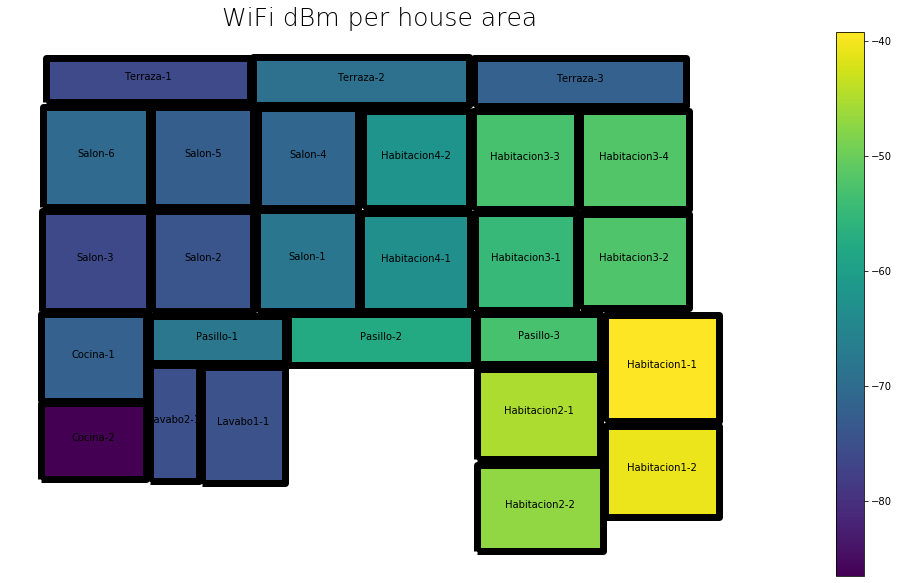

In [59]:
title = 'WiFi dBm per house area'
col_name = 'dBm_Signal'
label = 'name'
gdf = my_wifi_5G_mean

#Plot choropleth    
plot_choropleth(gdf,title,col_name,label)

## Band Ocupancy Analysis

In [12]:
zone1_1_2G = scanned[(scanned.zone == 1) & (scanned.subzone == 1) & (scanned.Channel <= 14)]
zone1_1_2G = zone1_1_2G.sort_values('dBm_Signal',ascending=False).drop_duplicates(['SSID'],keep='first')
zone1_1_2G

,BSSID,SSID,zone,subzone,dBm_Signal,Channel,Crypto
56,00:4a:77:e8:1b:c6,WifiAle-2.4G,1,1,-36,11,"{'WPA/PSK', 'WPA2/PSK'}"
59,50:7e:5d:67:53:ed,Orange-53EB,1,1,-51,11,"{'WPA/PSK', 'WPA2/PSK'}"
42,78:11:dc:e6:d0:97,rockrobo-vacuum-v1_miapD097,1,1,-59,6,{'OPN'}
21,44:fb:5a:b3:48:c0,DIGIFIBRA-PfRf,1,1,-60,5,{'WEP'}
18,04:a2:22:1e:1a:16,MiFibra-1A14,1,1,-63,1,{'WEP'}
16,62:8d:36:d1:75:61,Invitado-755E,1,1,-64,1,{'WEP'}
15,48:8d:36:d1:75:60,MiFibra-755E,1,1,-64,1,{'WEP'}
58,f4:06:8d:8c:ab:b1,devolo-bb1,1,1,-68,11,{'WPA2/PSK'}
47,ec:f4:51:55:0a:a1,MiFibra-0A9F,1,1,-69,6,{'WEP'}
27,ac:cf:85:52:bd:b5,_ONOWiFi,1,1,-72,5,{'OPN'}


In [46]:
zone1_1_2G = zone1_1_2G.sort_values('dBm_Signal',ascending=False).reset_index(drop=True)

# Create figure
fig = go.Figure()

# Create scatter trace of text labels
fig.add_trace(go.Scatter(
    x=zone1_1_2G.Channel,
    y=zone1_1_2G.dBm_Signal,
    text=zone1_1_2G.SSID,
    mode='text',
))

# Add shapes
i = 0
for row in zone1_1_2G.itertuples() :
    i += 1
    fig.add_shape(
        type='circle',
        name=row.SSID,
        xref='x',
        yref='y',
        x0=row.Channel-2,
        y0=-row.dBm_Signal-200,
        x1=row.Channel+2,
        y1=row.dBm_Signal,
        opacity=0.3,
        fillcolor=colors2[i%len(colors2)],
        line_color=colors2[i%len(colors2)]
    )

fig.update_layout(
    title='WiFi Signal per channel - 2.4GHz',
    yaxis=dict(
        title='dBm',
        range = (-100,zone1_1_2G.dBm_Signal.max()+10)
    ),
    xaxis=dict(
        title='Channels',
        nticks=17
    )
)
fig.show()

In [14]:
zone1_1_5G = scanned[(scanned.Channel > 14)] #(scanned.zone == 1) & (scanned.subzone == 1) & 
zone1_1_5G = zone1_1_5G.sort_values('dBm_Signal',ascending=False).drop_duplicates(['SSID'],keep='first')
zone1_1_5G

,BSSID,SSID,zone,subzone,dBm_Signal,Channel,Crypto
65,00:4a:77:e8:1b:c7,WifiAle-5G,1,1,-39,48,"{'WPA/PSK', 'WPA2/PSK'}"
664,f4:06:8d:8c:ab:b2,devolo-bb1,3,2,-63,36,{'WPA2/PSK'}
731,ee:f4:51:55:0a:a2,MiFibra-0A9F-5G,3,3,-67,52,{'WPA2/PSK'}
729,e6:f4:51:55:0a:a2,MiFibra-0A9F,3,3,-69,52,{'WPA2/PSK'}
1892,74:b5:7e:f2:70:ff,MIWIFI_5G_pvER,9,1,-74,48,"{'WPA2/PSK', 'WPA/PSK'}"
1882,26:57:60:94:8b:4a,MOVISTAR_8B41,9,1,-80,36,{'WPA2/PSK'}
1881,34:57:60:94:8b:4a,MOVISTAR_PLUS_8B41,9,1,-80,36,{'WPA2/PSK'}
1238,46:fe:3b:3e:dc:9a,MiFibra-DC97,5,3,-87,56,{'WPA2/PSK'}
1885,e4:ca:12:8c:b0:1a,MIWIFI_5G_pLzb,9,1,-91,40,"{'WPA2/PSK', 'WPA/PSK'}"


In [47]:
# Create figure
fig = go.Figure()

# Create scatter trace of text labels
fig.add_trace(go.Scatter(
    x=zone1_1_5G.Channel,
    y=zone1_1_5G.dBm_Signal,
    text=zone1_1_5G.SSID,
    mode='text',
))

# Add shapes
i = 0
for row in zone1_1_5G.itertuples() :
    i += 1
    fig.add_shape(
        type='circle',
        name=row.SSID,
        xref='x',
        yref='y',
        x0=row.Channel-2,
        y0=-row.dBm_Signal-200,
        x1=row.Channel+2,
        y1=row.dBm_Signal,
        opacity=0.3,
        fillcolor=colors2[i%len(colors2)],
        line_color=colors2[i%len(colors2)]
    )

fig.update_layout(
    title='WiFi Signal per channel - 2.4GHz',
    yaxis=dict(
        title='dBm',
        range = (-100,zone1_1_2G.dBm_Signal.max()+10)
    ),
    xaxis=dict(
        title='Channels',
        nticks=17
    )
)
fig.show()

## Different Wi-Fi Ubication Simulation
A partir de las intensidades de señal medidas a lo largo de la casa, podemos simular que el router se encuetra en otro lugar aplicando de manera reciproca las ganancias que hay de una habitacion a otra.

Una vez seleccionada la ubicación nueva del Wi-Fi, calculamos las ganancias a cada una de las otras habitaciones y simulamos el nuevo plano.

In [151]:
dBm_max = my_wifi_5G_mean.dBm_Signal.max()

def calc_atts(df):
    atts = {}
    for name in df.name.unique() :
        source = df[(df.name == name)].iloc[0]
        source_signal = source.dBm_Signal
    
        atts[name] = {}
        for row in df.itertuples() :
            atts[name][row.name] = {}
            atts[name][row.name] = round(abs(source_signal-row.dBm_Signal),3)

    return atts

#Atenuations dictionary
atts = calc_atts(my_wifi_5G_mean)

In [263]:
#Distance between house areas
zone1_1 = my_wifi_5G_mean.iloc[3]
zone1_2 = my_wifi_5G_mean.iloc[4]
zone2_1 = my_wifi_5G_mean.iloc[5]
zone5_1 = my_wifi_5G_mean.iloc[13]
zone5_5 = my_wifi_5G_mean.iloc[17]

p1_1 = zone1_1.geometry.centroid
p1_2 = zone1_2.geometry.centroid
p2_1 = zone2_1.geometry.centroid
p5_1 = zone5_1.geometry.centroid
p5_5 = zone5_5.geometry.centroid

dBm1_1 = zone1_1.dBm_Signal
dBm1_2 = zone1_2.dBm_Signal
dBm2_1 = zone2_1.dBm_Signal
dBm5_1 = zone5_1.dBm_Signal
dBm5_5 = zone5_5.dBm_Signal

#dBloss_per_m = round(abs(dBm5_1-dBm5_5)/(p5_1.distance(p5_5)*2.6),3)
dBloss_per_m = 3

#dBloss_per_w = round(abs(dBm1_1-dBm2_1) - dBloss_per_m*(p1_1.distance(p2_1)*2.6),3)
dBloss_per_w = 6

print('Loss per meter = {}dB'.format(dBloss_per_m))
print('Loss per wall = {}dB'.format(dBloss_per_w))

Loss per meter = 3dB
Loss per wall = 6dB


In [264]:
#Walls bt house areas
walls_bt = [
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [1, 0, 1, 1, 3, 3, 5, 3, 4, 2],
    [1, 1, 0, 2, 2, 3, 4, 2, 3, 3],
    [1, 1, 2, 0, 1, 2, 5, 3, 4, 1],
    [1, 3, 2, 1, 0, 1, 3, 3, 3, 1],
    [1, 3, 3, 2, 1, 0, 2, 2, 2, 1],
    [1, 5, 4, 5, 3, 2, 0, 2, 1, 2],
    [1, 3, 2, 3, 3, 2, 2, 0, 1, 3],
    [1, 4, 3, 4, 3, 2, 1, 1, 0, 3],
    [2, 2, 3, 1, 1, 1, 2, 3, 3, 0]
]

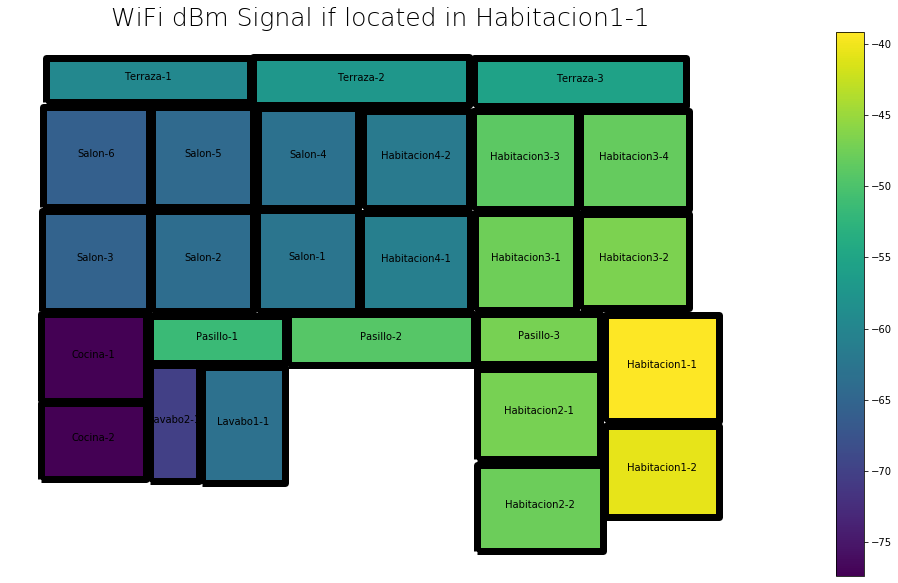

In [292]:
def recalc_signal_strength(df,name) :
    orig = df[df['name'] == name].iloc[0]
    
    def recalc_dBm (row) :
        dist = orig.geometry.centroid.distance(row.geometry.centroid)
        walls = walls_bt[orig.zone][row.zone]
        att = dist*dBloss_per_m + walls*dBloss_per_w
        
        row.dBm_Signal = dBm_max - att
        return row
    
    return df.apply(recalc_dBm, axis=1)

name = 'Habitacion1-1' #New source name
recalc_df = recalc_signal_strength(my_wifi_5G_mean,name)

#Draw result
title='WiFi dBm Signal if located in {}'.format(name)
col_name = 'dBm_Signal'
label='name'
plot_choropleth(recalc_df,title,col_name,label)

In [290]:
#Calculate optimal WiFi ubication
def optimal_room(df) :
    recalc_dfs = []
    i = 0
    max_score = -1
    
    def calc_score(df) :
        score = 0
        scores = []
        for zone in df.zone.unique() :
            zone_df = df[df.zone == zone]
            mW_Signal = math.pow(10,zone_df.dBm_Signal.mean()/10)
            if zone == 5 :
                scores.append(mW_Signal * 1.5)
            elif zone in [1,2,3,4] :
                scores.append(mW_Signal * 1.25)
            else :
                scores.append(mW_Signal * 1)
                
        return sum(scores)/len(scores)*10**6
        
    for name in my_wifi_5G_mean['name'].unique() :
        recalc_df = recalc_signal_strength(my_wifi_5G_mean,name)
        recalc_dfs.append(recalc_df)
        room_score = round(calc_score(recalc_df),3)
        if room_score > max_score :
            max_score = room_score
            opt_room_df = recalc_df
            opt_room_name = name
            opt_room_mean = round(recalc_df.dBm_Signal.mean(),3)
            opt_room_std = round(recalc_df.dBm_Signal.std(),3)
    
    print('Best WiFi location is {}. Score = {}'.format(opt_room_name,max_score))
    print('Signal mean {}dBm'.format(opt_room_mean))
    print('Signal std {}dBm'.format(opt_room_std))
    return opt_room_df,opt_room_name

opt_room_df,opt_room_name = optimal_room(my_wifi_5G_mean)

Best WiFi location is Pasillo-2. Score = 22.767
Signal mean -48.401dBm
Signal std 3.779dBm


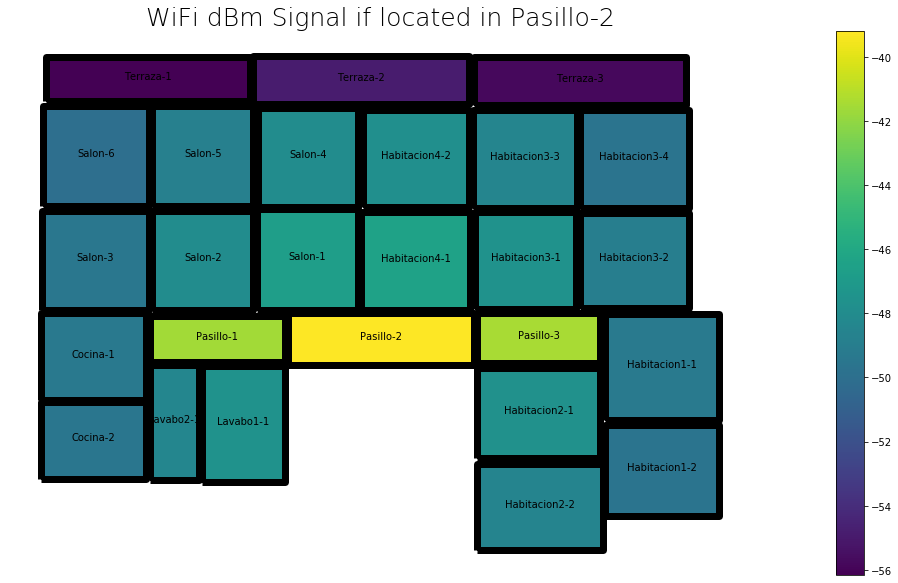

In [291]:
#Draw result
title='WiFi dBm Signal if located in {}'.format(opt_room_name)
col_name = 'dBm_Signal'
plot_choropleth(opt_room_df,title,col_name,label)

## WiFi Repeater Simulation